In [57]:
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as sc
import hdbscan

big_data = pd.read_csv('airbnb_coded.2.0.csv', parse_dates=['host_since'])
sc = sc()
pd.options.mode.chained_assignment = None  # default='warn'
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
var = 'bathrooms'
var2 = 'accommodates'
var3 = 'cleaning_fee'
var4 = 'bedrooms'
var5 = 'beds'
var6 = 'minimum_nights_x'
var7 = 'maximum_nights'
var8 = 'number_of_reviews_y'
var9 = 'listing_class'
var10 = 'price_x'
var11 = 'bed_code'
var12 = 'cancellation_policy_mapped'
var13 = 'room_code'
var14 = 'superhost'
var15 = 'instant_book'
var16 = 'review_scores_location'
var17 = 'review_scores_rating'
var18 = 'host_total_listings_count'
var19 = 'availability_90'
var20 = 'room_code'
var21 = 'extra_people'
var22 = 'property_type'
var23 = 'review_scores_value'
var24 = 'review_scores_cleanliness'
var25 = 'review_scores_checkin'
var26 = 'review_scores_communication'
var27 = 'review_scores_value'
var28 = 'guests_included'
var29 = 'security_deposit'
var30 = 'host_since'
var31 = 'longitude_x'
var32 = 'latitude_x'
var33 = 'amenities'

# big_data = big_data[big_data.price_x < 500]

data = big_data[[var, var2, var3, var4, var5, var6, var7, var8, var11, var12, var13, var14, var15, var16, var17, var18, var19, var20, var21, var22, var23, var24,
                 var25, var26, var27, var28, var29, var30, var31, var32, var33, var9, var10]]



data[var21] = data[var21].str.replace(',', '')
data[var21] = data[var21].str.replace('$', '')

big_data[var21] = big_data[var21].str.replace(',', '')
big_data[var21] = big_data[var21].str.replace('$', '')

data[var29] = data[var29].str.replace(',', '')
data[var29] = data[var29].str.replace('$', '')

big_data[var29] = big_data[var29].str.replace(',', '')
big_data[var29] = big_data[var29].str.replace('$', '')


data[var30] = (big_data.host_since - big_data.host_since.min())
data[var30] = data[var30].values.astype('timedelta64[D]').astype('float')

big_data[var30] = (big_data.host_since - big_data.host_since.min())
big_data[var30] = big_data[var30].values.astype('timedelta64[D]').astype('float')


data[var] = data[var].fillna(data[var].median())
data[var2] = data[var2].fillna(data[var2].median())
data[var3] = data[var3].fillna(data[var3].median())
data[var4] = data[var4].fillna(data[var4].median())
data[var5] = data[var5].fillna(data[var5].median())

data[var6][17990] = data[var6].median()
data[var6][6215] = data[var6].median()
data[var6][11299] = data[var6].median()
data[var6][12737] = data[var6].median()
data[var6][14598] = data[var6].median()
# data[var7][872] = 8000
# data[var7][2372] = 8000
# data[var7][4391] = 8000
# data[var7][17952] = 8000
# data[var7][17990] = data[var7].median()
# data[var7][6351] = data[var7].median()
# data[var7][8341] = data[var7].median()


data[var6] = data[var6].fillna(data[var6].median())
data[var7] = data[var7].fillna(data[var7].median())
data[var8] = data[var8].fillna(data[var8].median())
data[var10] = data[var10].fillna(data[var10].median())
data[var11] = data[var11].fillna(data[var11].median())
data[var12] = data[var12].fillna(data[var12].median())
data[var13] = data[var13].fillna(data[var13].median())
data[var14] = data[var14].fillna(data[var14].median())
data[var15] = data[var15].fillna(data[var15].median())
data[var16] = data[var16].fillna(data[var16].median())
data[var17] = data[var17].fillna(data[var17].median())
data[var18] = data[var18].fillna(data[var18].median())
data[var19] = data[var19].fillna(data[var19].median())
data[var20] = data[var20].fillna(data[var20].median())
data[var21] = data[var21].fillna(data[var21].median())
data[var22] = data[var22].fillna('Apartment')
data[var23] = data[var23].fillna(data[var23].median())
data[var24] = data[var24].fillna(data[var24].median())
data[var25] = data[var25].fillna(data[var25].median())
data[var26] = data[var26].fillna(data[var26].median())
data[var27] = data[var27].fillna(data[var27].median())
data[var28] = data[var28].fillna(data[var28].median())
data[var29] = data[var29].fillna(data[var29].median())
data[var30] = data[var30].fillna(data[var30].median())
data[var31] = data[var31].fillna(data[var31].median())
data[var32] = data[var32].fillna(data[var32].median())






# data[var6][17990] = data[var6].median()

# data = data.drop(data.index[17990])
# data = data.drop(data.index[14598])

data = data[[var31, var32, var10]]

X = data.iloc[:, :-1].values
# y = data.iloc[:, -1].values
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-4])], remainder='passthrough')
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-5])], remainder='passthrough')
# X = ct.fit_transform(X)
# X = X.todense()
# X = np.array(X)
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-6])], remainder='passthrough')
# X = ct.fit_transform(X)
# # X = X.todense()
# X = np.array(X)

# plt.scatter(data[var6].values, data[var7].values, s=100, c='red', alpha=0.5)
# plt.show()

print(X)
# X[:,-8:] = sc.fit_transform(X[:,-8:])
# X = sc.fit_transform(X)
# print(X[0])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

# data.head()

[[13.4462961  52.48141516]
 [13.41708604 52.60610923]
 [13.50276362 52.44614449]
 ...
 [13.29098912 52.4976456 ]
 [13.38508885 52.46504928]
 [13.58954646 52.46768108]]


In [59]:
def plot_clusters(data, algorithm, args, kwds):
    labels = algorithm(*args, **kwds).fit_predict(data)
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.title("Location Distribution Clustered n=4")
    plt.ylabel('longitude')
    plt.xlabel('latitude')
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    plt.savefig('loc_clustered_1.png')
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

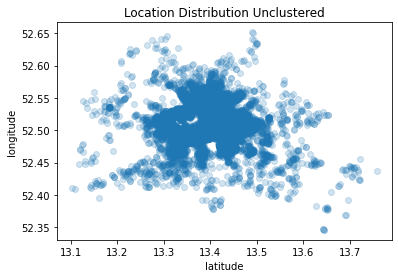

In [39]:
plt.title("Location Distribution Unclustered")
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.scatter(X.T[0], X.T[1], alpha=0.2)
plt.savefig('loc_unclustered.png')

In [ ]:
# label = hdbscan.HDBSCAN(min_cluster_size=450, min_samples=15).fit_predict(cluster_data)
label = cluster.KMeans(n_clusters=10).fit_predict(X)
max(label)

IndexError: index 1 is out of bounds for axis 0 with size 1

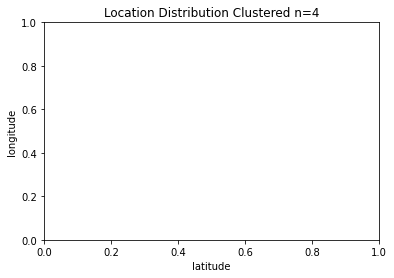

In [49]:
plot_clusters(X[:,:-1], cluster.KMeans, (), {'n_clusters':4})

In [60]:
# label = hdbscan.HDBSCAN(min_cluster_size=450, min_samples=15).fit_predict(cluster_data)
clusterer = cluster.KMeans(n_clusters=4)
X = clusterer.fit_predict(X)
# clusterer.fit(X)
# Clusters = clusterer.predict(X)
data['loc_class'] = X
big_data['loc_class'] = X
data.head()

,longitude_x,latitude_x,price_x,loc_class
0,13.446296,52.481415,35.0,0
1,13.417086,52.606109,80.0,1
2,13.502764,52.446144,50.0,2
3,13.473918,52.516235,80.0,0
4,13.383814,52.511494,180.0,1


In [51]:
data = data[[var31, var32, 'loc_class', var10]]
X = data.iloc[:, :-2].values
print(X)
y = data.iloc[:, -2].values
# X = ct.fit_transform(X)
# X = X.todense()
# X = np.array(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

[[13.4462961  52.48141516]
 [13.41708604 52.60610923]
 [13.50276362 52.44614449]
 ...
 [13.29098912 52.4976456 ]
 [13.38508885 52.46504928]
 [13.58954646 52.46768108]]


In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=65, weights='distance')
classifier = classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

1.0
0.9935340846111214


In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, min_samples_leaf=1)
classifier = classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

1.0
0.9961204507666728


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=2)
classifier = classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, 
                          y_train, scoring='accuracy', cv=5)
print(scores)
np.mean(scores)

In [61]:
# After clustering of property types
big_data.to_csv('airbnb_coded.2.0.csv')

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=500, min_samples_leaf=1)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)